In [1]:
!pip install ultralytics --quiet

from ultralytics import YOLO
import zipfile, os

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.3 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
zip_file = "/content/drive/MyDrive/KITTI/Final_Dataset.zip"
dataset_dir = "/content/Final_Dataset"

In [5]:
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(dataset_dir)

print("✅ Dataset unzipped!")
!ls {dataset_dir}

✅ Dataset unzipped!
'Final Dataset'


In [16]:
from ultralytics import YOLO

dataset_dir = "/content/Final_Dataset/Final Dataset"

model = YOLO("yolov8n-cls.pt")

# Train the model
model.train(
    data=dataset_dir,   # dataset path with train/ and val/
    epochs=30,          # increase if needed
    imgsz=224,          # standard for classification
    batch=16
)


Ultralytics 8.3.193 🚀 Python-3.12.11 torch-2.8.0+cu126 CPU (Intel Xeon 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Final_Dataset/Final Dataset, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=224, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, p

ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d98d10bcc50>
curves: []
curves_results: []
fitness: 0.9529411792755127
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.9058823585510254, 'metrics/accuracy_top5': 1.0, 'fitness': 0.9529411792755127}
save_dir: PosixPath('/content/runs/classify/train2')
speed: {'preprocess': 0.0009375970581887112, 'inference': 12.733014702938389, 'loss': 6.950000598033726e-05, 'postprocess': 0.00014483235270959353}
task: 'classify'
top1: 0.9058823585510254
top5: 1.0

In [17]:
results = model.val(data="/content/Final_Dataset/Final Dataset/testing")
print(results.results_dict)


Ultralytics 8.3.193 🚀 Python-3.12.11 torch-2.8.0+cu126 CPU (Intel Xeon 2.20GHz)
YOLOv8n-cls summary (fused): 30 layers, 1,441,285 parameters, 0 gradients, 3.3 GFLOPs
WARNING ⚠️ Dataset 'split=train' not found at /content/Final_Dataset/Final Dataset/testing/train
Found 320 images in subdirectories. Attempting to split...
Splitting /content/Final_Dataset/Final Dataset/testing (5 classes, 320 images) into 80% train, 20% val...
Split complete in /content/Final_Dataset/Final Dataset/testing_split ✅
train: /content/Final_Dataset/Final Dataset/testing_split/train... found 255 images in 5 classes ✅ 
val: /content/Final_Dataset/Final Dataset/testing_split/val... found 65 images in 5 classes ✅ 
test: None...
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 344.9±76.2 MB/s, size: 33.3 KB)
val: Scanning /content/Final_Dataset/Final Dataset/testing_split/val... 65 images, 0 corrupt: 100% ━━━━━━━━━━━━ 65/65 3.8Kit/s 0.0s
val: New cache created: /content/Final_Dataset/Final Dataset/testing_split/val

Saving mycar6.jpg to mycar6.jpg

image 1/1 /content/mycar6.jpg: 224x224 High 0.73, Traffic Jam 0.24, Medium 0.01, Low 0.01, Empty 0.00, 20.9ms
Speed: 4.6ms preprocess, 20.9ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
✅ Predicted class: High (0.73 confidence)


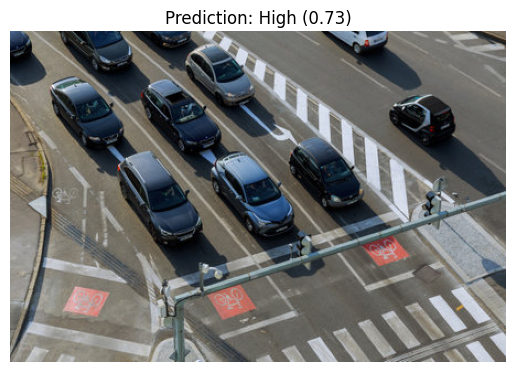

In [26]:
from google.colab import files
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2

# 1. Upload image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# 2. Load your trained model
model = YOLO("/content/runs/classify/train2/weights/best.pt")

# 3. Run prediction
results = model.predict(image_path, imgsz=224)

# 4. Get predicted class
pred_id = results[0].probs.top1
pred_name = results[0].names[pred_id]
pred_conf = results[0].probs.top1conf.item()

print(f"✅ Predicted class: {pred_name} ({pred_conf:.2f} confidence)")

# 5. Show image with prediction
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title(f"Prediction: {pred_name} ({pred_conf:.2f})")
plt.axis("off")
plt.show()


In [27]:
from google.colab import files

# Path to best model
model_path = "/content/runs/classify/train2/weights/best.pt"

# Download to your local machine
files.download(model_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>